# **Training, Optimization and Evaluation**

→ In this notebook the model is trained, optimised and evaluated.


### **_IMPORTS_**

In [156]:
# Import packages
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


Notebook "data_preprocessing.ipynb" run to get variables:

In [157]:
%run data_preprocessing.ipynb

### **_MODEL_**

#### Used GridSearch to find the best parameters for RandomForestRegressor model



In [162]:
def randomForestReg(X_train, y_train, X_test, y_test, title=None, optimize=False, plot: bool = True):
    param_grid_rf = {
        'n_estimators': [200, 400, 600, 800],
        'max_depth': [10, 15, 20]
    }

    randomForest = RandomForestRegressor(max_depth=15, n_estimators=600, max_features=3, random_state=42) #max_features=3 against overfitting

    if optimize:
        grid_search = GridSearchCV(estimator=randomForest, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error', verbose=1)
        grid_search.fit(X_train, y_train.values.ravel())  
        randomForest = grid_search.best_estimator_
        print(f"Best parameters for Random Forest: {grid_search.best_params_}")
    else:
        randomForest.fit(X_train, y_train.values.ravel())


    if plot:
        y_pred = randomForest.predict(X_test)
        
        print(f"{title}:")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
        print(f"R²-Score: {r2_score(y_test, y_pred)}")

        y_pred = randomForest.predict(X_test)

        y_test_values = y_test.values.ravel()  

        plt.figure(figsize=(8, 6))
        plt.scatter(y_test_values, y_pred, alpha=0.5)
        plt.plot([min(y_test_values), max(y_test_values)], 
                [min(y_test_values), max(y_test_values)], '--', color='red')  
        plt.xlabel("Actual values")
        plt.ylabel("Predicted values")
        plt.title("Actual calories vs. Predicted calories")
        plt.show()



    return randomForest


Random Forest:
Mean Absolute Error: 1.80821459792932
Mean Squared Error: 9.139041302441523
Root Mean Squared Error: 3.0230847329245543
R²-Score: 0.997598624203788


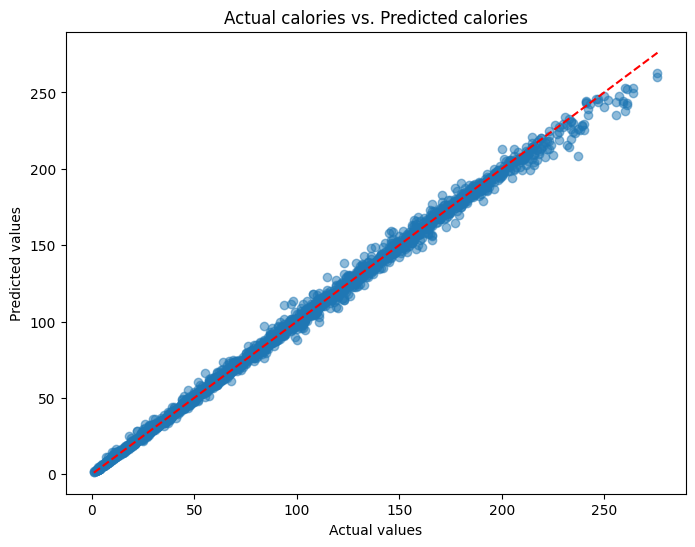

In [163]:
randomForest = randomForestReg(X_train, y_train, X_test, y_test, "Random Forest", False)
# Best parameters for Random Forest: {'max_depth': 15, 'n_estimators': 600}


# **Evaluierung:**

### Interpretation of the results:
The evaluation metrics indicate that the random forest model performs very well:

- Mean Absolute Error (MAE): 1.81
→ The average absolute deviation of the predictions from the actual values is only around 1.81 units. This is a very low error value.

- Mean Squared Error (MSE): 9.14
→ Square deviations emphasise larger errors more strongly, but this value is also relatively low.

- Root mean squared error (RMSE): 3.02
→ RMSE is comparable to MAE, but emphasises larger errors more strongly. A value of 3.02 means that the average deviation of the predictions is around 3.02.

- R² score: 0.9970
→ This value is close to 1, which indicates that the model explains almost all of the variance in the data. A perfect model would have an R² value of 1.

### Conclusion:
The model provides very accurate predictions


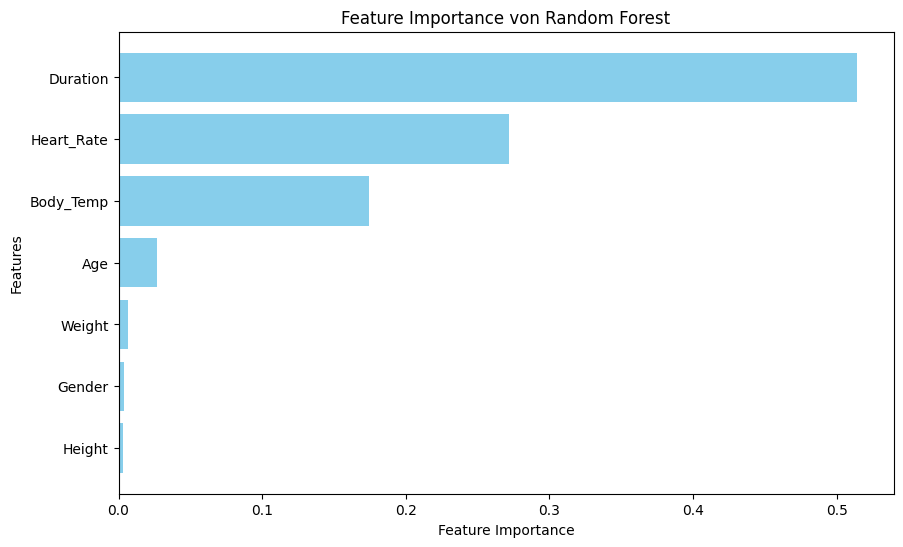

In [160]:
importances = randomForest.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance von Random Forest")
plt.gca().invert_yaxis()
plt.show()


##### Overfitting check: comparison of training vs. test:

In [161]:
y_train_pred = randomForest.predict(X_train)
y_test_pred = randomForest.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Trainings-R²: {train_r2}")
print(f"Test-R²: {test_r2}")


Trainings-R²: 0.9996279182291822
Test-R²: 0.997598624203788
